<a href="https://colab.research.google.com/github/cgrundman/ZTM-TensorFlow-Developer/blob/main/03_introduction_to_computer_vision_in_tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which discover patterns in visual data. Such as the cameras of a self-driving car recognizing the car in front.



## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-05-02 14:02:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  94.8MB/s    in 1.1s    

2024-05-02 14:03:00 (94.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a machine learning project this means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak | head -10

1000205.jpg
100135.jpg
101312.jpg
1021458.jpg
1032846.jpg
10380.jpg
1049459.jpg
1053665.jpg
1068516.jpg
1068975.jpg


In [5]:
import os

# Walk through pizza_steak directory and list the number of files
for dirpath, dirnames, filenames, in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, let's get the class names programmatically.

In [7]:
# Get the class anmes programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the btarget image directory (we'll view imagews from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape {img.shape}")

  return img

['568995.jpg']
Image shape (384, 512, 3)


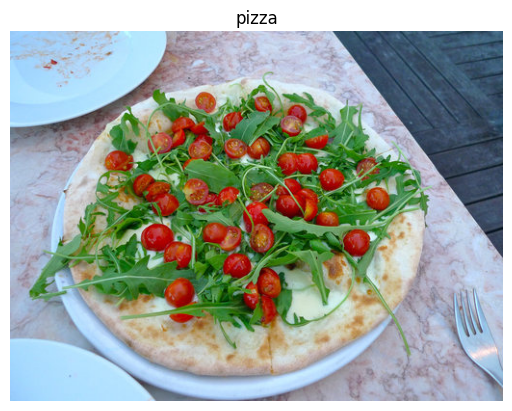

In [9]:
# View a random image from the training data set
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[151, 202, 247],
        [152, 203, 248],
        [153, 204, 249],
        ...,
        [ 66, 101, 131],
        [ 63,  98, 126],
        [ 60,  95, 123]],

       [[151, 202, 247],
        [151, 202, 247],
        [151, 202, 247],
        ...,
        [ 67, 104, 133],
        [ 63, 100, 127],
        [ 60,  97, 124]],

       [[151, 202, 247],
        [150, 201, 246],
        [150, 201, 246],
        ...,
        [ 63, 102, 131],
        [ 61, 100, 129],
        [ 58,  97, 126]],

       ...,

       [[147, 201, 248],
        [149, 203, 250],
        [150, 204, 251],
        ...,
        [133, 150, 170],
        [131, 147, 162],
        [131, 145, 158]],

       [[148, 202, 249],
        [149, 203, 250],
        [150, 204, 251],
        ...,
        [132, 149, 167],
        [131, 147, 162],
        [130, 147, 157]],

       [[148, 202, 249],
        [149, 203, 250],
        [149, 203, 250],
        ...,
        [131, 146, 16

In [11]:
# View the image shape
img.shape

(384, 512, 3)

In [12]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.59215686, 0.79215686, 0.96862745],
        [0.59607843, 0.79607843, 0.97254902],
        [0.6       , 0.8       , 0.97647059],
        ...,
        [0.25882353, 0.39607843, 0.51372549],
        [0.24705882, 0.38431373, 0.49411765],
        [0.23529412, 0.37254902, 0.48235294]],

       [[0.59215686, 0.79215686, 0.96862745],
        [0.59215686, 0.79215686, 0.96862745],
        [0.59215686, 0.79215686, 0.96862745],
        ...,
        [0.2627451 , 0.40784314, 0.52156863],
        [0.24705882, 0.39215686, 0.49803922],
        [0.23529412, 0.38039216, 0.48627451]],

       [[0.59215686, 0.79215686, 0.96862745],
        [0.58823529, 0.78823529, 0.96470588],
        [0.58823529, 0.78823529, 0.96470588],
        ...,
        [0.24705882, 0.4       , 0.51372549],
        [0.23921569, 0.39215686, 0.50588235],
        [0.22745098, 0.38039216, 0.49411765]],

       ...,

       [[0.57647059, 0.78823529, 0.97254902],
        [0.58431373, 0.79607843, 0.98039216],
        [0.58823529, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Preprocess our data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 145ms/step - loss: 0.5850 - accuracy: 0.6687 - val_loss: 0.4432 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4422 - accuracy: 0.7973 - val_loss: 0.3557 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4137 - accuracy: 0.8153 - val_loss: 0.3280 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3564 - accuracy: 0.8533 - val_loss: 0.3039 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3183 - accuracy: 0.8727 - val_loss: 0.2838 - val_accuracy: 0.8920


In [14]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we've built in a previous section to see if if works withour image data.

The model we're building is from tensorflow playground.

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# COmpile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 126ms/step - loss: 0.6937 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 155ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.4747 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameter than our CNN (model 1), model_2 performs terribly... let's try again.

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# COmpile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 110ms/step - loss: 2.7176 - accuracy: 0.6113 - val_loss: 1.1842 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 1.1775 - accuracy: 0.6900 - val_loss: 0.5528 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.5535 - accuracy: 0.7700 - val_loss: 0.4946 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6714 - accuracy: 0.7513 - val_loss: 0.4657 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 5s 105ms/step - loss: 0.4710 - accuracy: 0.8027 - val_loss: 0.4606 - val_accuracy: 0.8080


In [18]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (vizualize, vizualize, vizualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3223601.jpg']
Image shape (512, 512, 3)
['2426686.jpg']
Image shape (341, 512, 3)


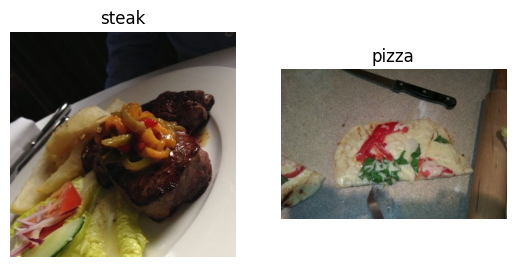

In [29]:
# Vizualize Data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [30]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images, at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into memory of your processor (GPU).
2. Trying to learn the patterns in the 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because 32 is good for your health...

In [31]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [32]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory
                                               target_size=(224, 224), # target size of the images (height, width)
                                               class_mode='binary', # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [33]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the "next" batch of images/lables in train_data
len(images), len(labels)

(32, 32)

In [34]:
# How many batches are there?
len(train_data)

47

In [35]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [37]:
images[7].shape

(224, 224, 3)

In [38]:
# Veiw the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. lookup which current model is performing best in the field for your problem).

In [40]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [41]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filters is the number of sliding widnwos going across an input
           kernel_size=3, # size of sliding window going across input
           strides=1, # size of step sliding window takes across an inputt
           padding="valid", # if "same" output size equals input size, if "valid" output gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 neuron)
])

In [43]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [44]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 484000)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 485191 (1.85 MB)
Trainable params: 485191 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [46]:
# Check the lengths of traininf and test data generators
len(train_data), len(test_data)

(47, 16)

In [47]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 114ms/step - loss: 1.9594 - accuracy: 0.6240 - val_loss: 0.5410 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4332 - accuracy: 0.8173 - val_loss: 0.4215 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.2578 - accuracy: 0.9007 - val_loss: 0.4025 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.1253 - accuracy: 0.9653 - val_loss: 0.4231 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.0616 - accuracy: 0.9840 - val_loss: 0.4573 - val_accuracy: 0.8120


In [48]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 106ms/step - loss: 0.2838 - accuracy: 0.8920


[0.2837526500225067, 0.8920000195503235]

In [50]:
model_4.evaluate(test_data)

16/16 [==============================] - 4s 198ms/step - loss: 0.4573 - accuracy: 0.8120


[0.457256019115448, 0.8119999766349792]